## Cohort Analysis

In [678]:
import numpy as np 
import pandas as pd 
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Understand Data

#### Load data

In [388]:
data = pd.read_csv('online_retail.csv', index_col=False)

data.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [389]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [390]:
for x in data.columns: 
    print(x)
    print(data[x].values)

index
[     0      1      2 ... 541906 541907 541908]
InvoiceNo
['536365' '536365' '536365' ... '581587' '581587' '581587']
StockCode
['85123A' '71053' '84406B' ... '23254' '23255' '22138']
Description
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'CHILDRENS CUTLERY DOLLY GIRL '
 'CHILDRENS CUTLERY CIRCUS PARADE' 'BAKING SET 9 PIECE RETROSPOT ']
Quantity
[6 6 8 ... 4 4 3]
InvoiceDate
['12/1/2010 8:26' '12/1/2010 8:26' '12/1/2010 8:26' ... '12/9/2011 12:50'
 '12/9/2011 12:50' '12/9/2011 12:50']
UnitPrice
[2.55 3.39 2.75 ... 4.15 4.15 4.95]
CustomerID
[17850. 17850. 17850. ... 12680. 12680. 12680.]
Country
['United Kingdom' 'United Kingdom' 'United Kingdom' ... 'France' 'France'
 'France']


### Preprocessing

In [391]:
df = data.copy()

df.head(1)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom


#### Drop index col

In [392]:
df = df.drop(columns='index')

df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom


#### Check Null values

In [393]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [394]:
len(df)

541909

#### Drop missing values

In [395]:
df = df.dropna(subset=['CustomerID'])

In [396]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [397]:
len(df) # 541909 -> customerID dropna: 406829

406829

#### Check & Drop Duplicates

In [398]:
print(df.duplicated().sum())

5225


In [399]:
df = df.drop_duplicates()

print(df.duplicated().sum())

0


In [400]:
len(df) # 406829 -> drop duplicated: 401604

401604

#### Change Datatype
- customer ID: String

In [401]:
df['CustomerID'].head(1)

0    17850.0
Name: CustomerID, dtype: float64

In [402]:
df['CustomerID'] = df['CustomerID'].astype(int).astype(str) # astype(int)를 하고 astype(str) 하는 이유는 .0을 지워주기 위해서이다.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [403]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

In [404]:
df.describe() # Quantity에 - 값, UnitPrice가 0인 값이 있음 -> 전처리 필요

,Quantity,UnitPrice
count,401604.000000,401604.000000
mean,12.183273,3.474064
std,250.283037,69.764035
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


In [405]:
df.shape

(401604, 8)

#### Quantity & Unit Price Filter
- Filter Quantity >= 1 & Unit Price > 0 

In [406]:
# Quantity

df[df['Quantity']<= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [407]:
df[df['Quantity']<=0][['StockCode','Quantity']].value_counts()

StockCode  Quantity
M          -1          129
22423      -1           91
POST       -1           83
D          -1           72
22720      -1           39
                      ... 
22469      -17           1
           -11           1
           -6            1
           -4            1
22769      -2            1
Length: 4583, dtype: int64

In [408]:
# UnitPrice

df[df['UnitPrice']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410,United Kingdom


In [409]:
df[df['UnitPrice']<0.1]['UnitPrice'].value_counts()

0.060    113
0.040     66
0.080     53
0.000     40
0.070      9
0.001      4
0.030      3
0.090      2
0.010      1
Name: UnitPrice, dtype: int64

In [410]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [411]:
df.describe()

,Quantity,UnitPrice
count,392692.000000,392692.000000
mean,13.119702,3.125914
std,180.492832,22.241836
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


In [412]:
df.shape # 401604 -> (Quantity & UnitPrice) > 0: 392692

(392692, 8)

In [413]:
# 태블로에서 전처리하는게 까다롭기 때문에 python에서 전처리 후 태블로에서 작업
# df.to_csv('/Users/suminlee/Desktop/Github/KoreaUniv-202402/week13/data/online_retail_preprocessed.csv', index=False)

## EDA

### Understand Values

In [414]:
print(df.columns)
len(df)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


392692

In [415]:
print(f"Number of unique customerId: {df['CustomerID'].nunique()}") # len(df['CustomerID'].unique())
print(f"Number of unique invoices: {df['InvoiceNo'].nunique()}")
print(f"Number of unique products: {df['StockCode'].nunique()}")
print(f"Number of unique descriptions: {df['Description'].nunique()}")

Number of unique customerId: 4338
Number of unique invoices: 18532
Number of unique products: 3665
Number of unique descriptions: 3877


In [416]:
print(f"Most common products:\n{df['Description'].value_counts().head(10)}")

Most common products:
WHITE HANGING HEART T-LIGHT HOLDER    2016
REGENCY CAKESTAND 3 TIER              1713
JUMBO BAG RED RETROSPOT               1615
ASSORTED COLOUR BIRD ORNAMENT         1395
PARTY BUNTING                         1389
LUNCH BAG RED RETROSPOT               1303
SET OF 3 CAKE TINS PANTRY DESIGN      1152
POSTAGE                               1099
LUNCH BAG  BLACK SKULL.               1078
PACK OF 72 RETROSPOT CAKE CASES       1050
Name: Description, dtype: int64


### Distribution of Qty

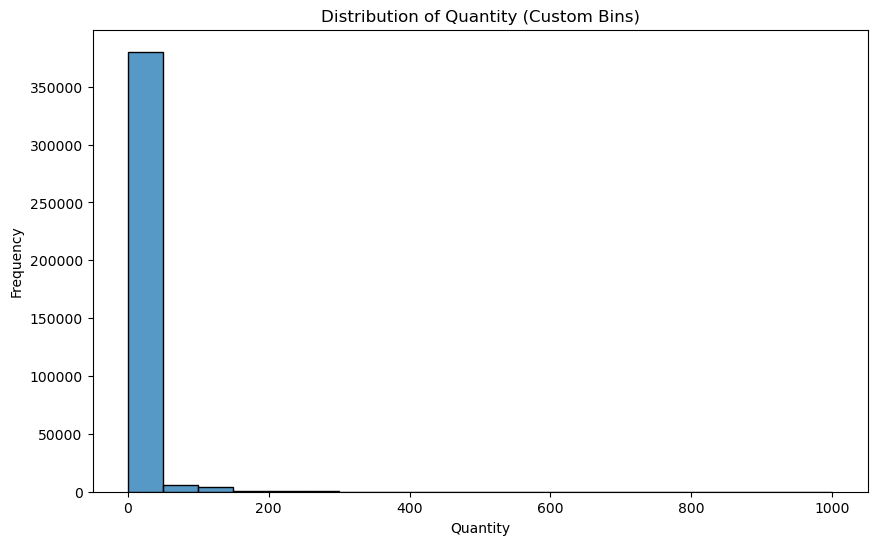

In [417]:
# Define custom bin ranges
bin_ranges = list(range(0, 1001, 50))  # Bins from 0 to 1000 in increments of 50

# Plot histogram with custom bins
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], bins=bin_ranges, kde=False) # 1000까지의 값들만 히스토그램에 나타냄
plt.title('Distribution of Quantity (Custom Bins)')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

In [418]:
len(df[df['Quantity']==1])

69592

Quantity가 1인 데이터 개수: 69592


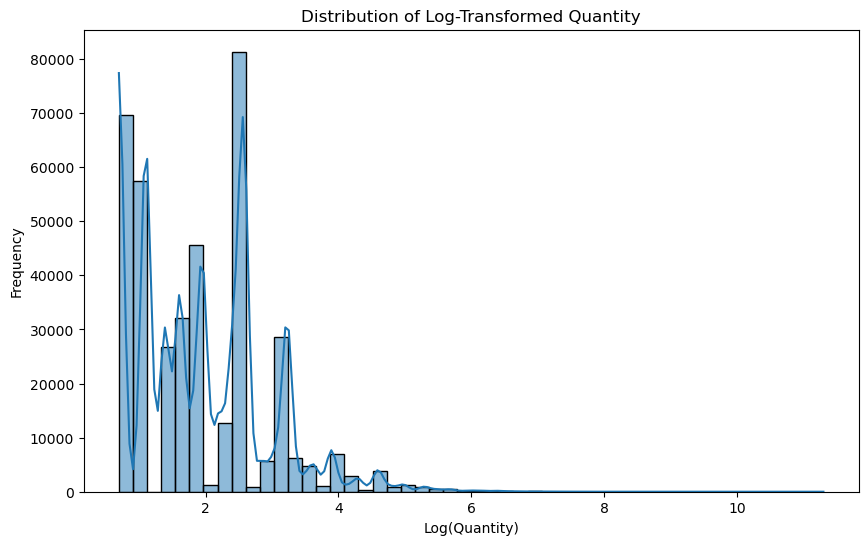

In [419]:
# Apply log transformation to Quantity
print(f'Quantity가 1인 데이터 개수: {len(df[df["Quantity"]==1])}')
      
df['Log_Quantity'] = df['Quantity'].apply(lambda x: np.log1p(x) if x > 0 else 0) # Quantity가 1인 데이터가 많기 때문에 np.log1p(x)로 로그 변환

# Plot histogram of log-transformed data
plt.figure(figsize=(10, 6))
sns.histplot(df['Log_Quantity'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed Quantity')
plt.xlabel('Log(Quantity)')
plt.ylabel('Frequency')
plt.show()


### Distribution of Transaction

In [420]:
df['InvoiceDate'].head(2)

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [421]:
df['InvoiceDate'].dt.to_period('M').head(2) # 년/월/일/시/분/초 -> 년/월

0    2010-12
1    2010-12
Name: InvoiceDate, dtype: period[M]

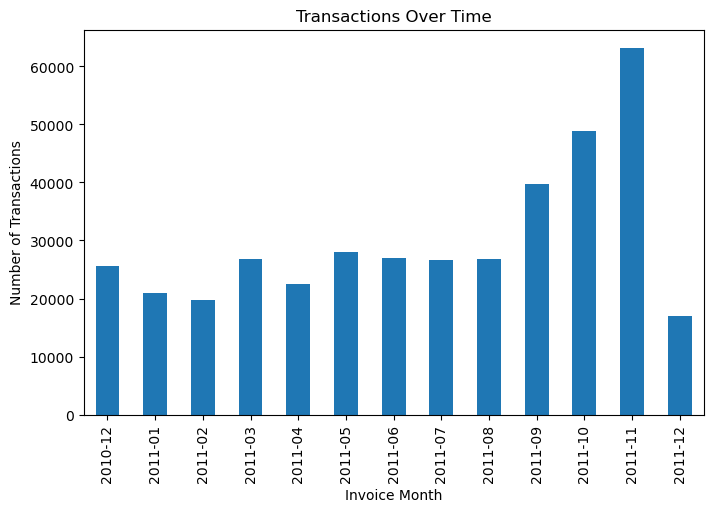

In [422]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

plt.figure(figsize=(8, 5))
df['InvoiceMonth'].value_counts().sort_index().plot(kind='bar')
plt.title('Transactions Over Time')
plt.xlabel('Invoice Month')
plt.ylabel('Number of Transactions')
plt.show()

### Customer location

Country Analysis:
Number of unique countries: 37

Top 10 countries by transactions:
United Kingdom    349203
Germany             9025
France              8326
EIRE                7226
Spain               2479
Netherlands         2359
Belgium             2031
Switzerland         1841
Portugal            1453
Australia           1181
Name: Country, dtype: int64


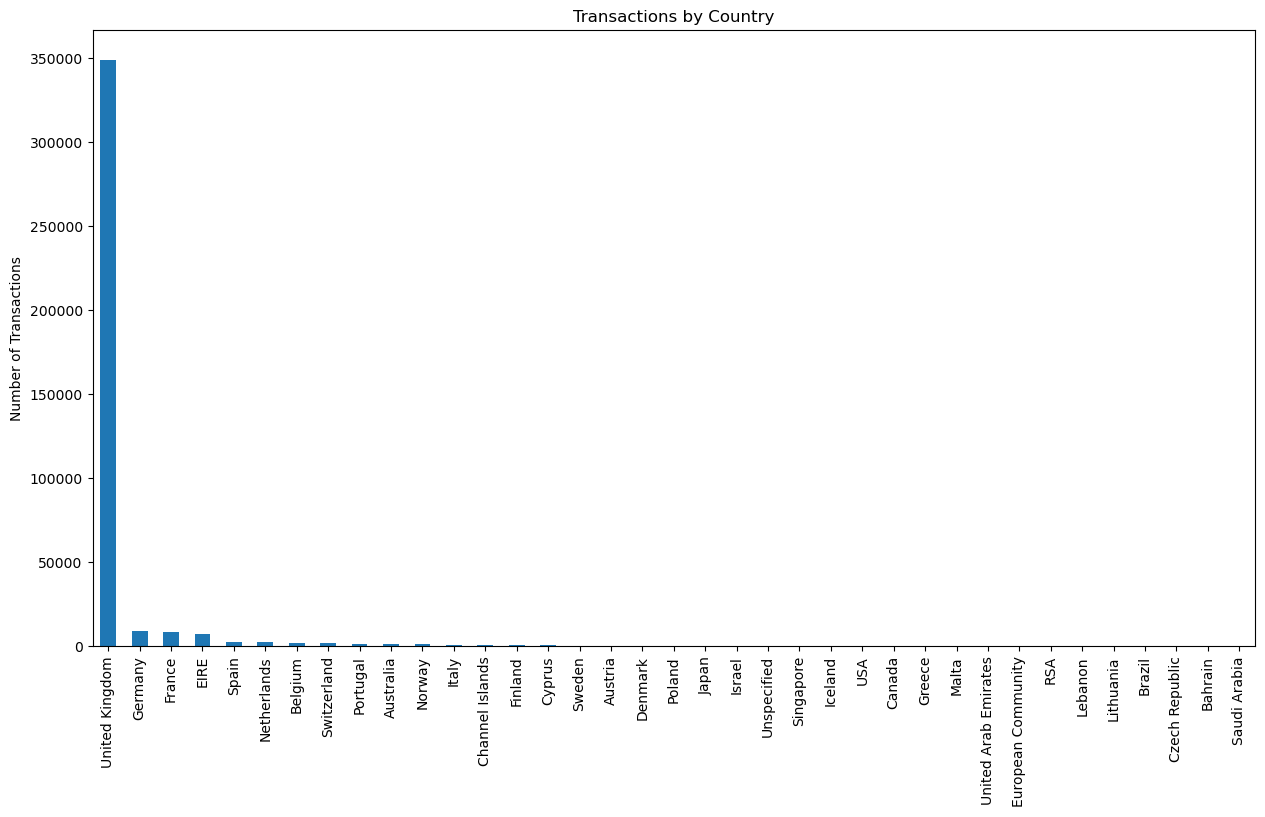

In [423]:
print("Country Analysis:")
print(f"Number of unique countries: {df['Country'].nunique()}\n")
print(f"Top 10 countries by transactions:\n{df['Country'].value_counts().head(10)}")

# Transactions by country
plt.figure(figsize=(15, 8))
df['Country'].value_counts().plot(kind='bar')
plt.title('Transactions by Country')
plt.ylabel('Number of Transactions')
plt.show()


## Cohort Analysis
- Cohort group: 고객의 첫번째 구매 날짜 

In [524]:
df1 = df.copy()

df1.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Log_Quantity,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,1.94591,2010-12


In [525]:
### Get Month
df1.rename(columns={'InvoiceDate':'InvoiceTime'}, inplace=True)
df1['InvoiceDate'] = df1['InvoiceTime'].dt.date

In [526]:
df1.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceTime,UnitPrice,CustomerID,Country,Log_Quantity,InvoiceMonth,InvoiceDate
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2.564949,2011-12,2011-12-09
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,1.945910,2011-12,2011-12-09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,1.609438,2011-12,2011-12-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,1.609438,2011-12,2011-12-09
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,1.386294,2011-12,2011-12-09


#### Cohort Month: 고객의 첫 구매 날짜

In [527]:
### Get Cohort Month
df1['FirstOrderDate'] = df1.groupby('CustomerID')['InvoiceDate'].transform('min') # transform 함수는 해당 그룹의 각 항목에 값을 반환한다.

In [528]:
## Check value 
df1[df1['CustomerID'] == '12680'][['InvoiceDate', 'FirstOrderDate']].value_counts() # 12680의 모든 데이터는 FirstOrderDate가 모두 같음

InvoiceDate  FirstOrderDate
2011-08-18   2011-08-18        20
2011-12-09   2011-08-18        15
2011-09-27   2011-08-18        10
2011-09-11   2011-08-18         7
dtype: int64

### Cohort Index
- 각 코호트의 월별 활성과 고객수를 계산

In [529]:
print(df1[['InvoiceTime', 'InvoiceMonth', 'InvoiceDate', 'FirstOrderDate']].dtypes)
df1[['InvoiceTime', 'InvoiceMonth', 'InvoiceDate', 'FirstOrderDate']].tail(1)

InvoiceTime       datetime64[ns]
InvoiceMonth           period[M]
InvoiceDate               object
FirstOrderDate            object
dtype: object


,InvoiceTime,InvoiceMonth,InvoiceDate,FirstOrderDate
541908,2011-12-09 12:50:00,2011-12,2011-12-09,2011-08-18


In [530]:
### Change FirstOrderDate to dataframe dtype
df1['FirstOrderMonth'] = pd.to_datetime(df1['FirstOrderDate'])
# 월의 첫째날 가져오기 
df1['FirstOrderMonth'] = df1['FirstOrderMonth'].dt.to_period('M') # 2024-01-15 -> 2024-01

In [ ]:
df1[df1['FirstOrderMonth'] == '2010-12'][['FirstOrderMonth','InvoiceMonth']].value_counts() # 2010년 12월이 첫주문인 고객들의 월별 구매 수

FirstOrderMonth  InvoiceMonth
2010-12          2010-12         25670
                 2011-11         21677
                 2011-09         14098
                 2011-10         13399
                 2011-05         11946
                 2011-08         11316
                 2011-07         11312
                 2011-03         11121
                 2011-06         11069
                 2011-01         10111
                 2011-04          9628
                 2011-02          8689
                 2011-12          7173
dtype: int64

In [532]:
# FirstOrderDate로부터 얼마 후에 주문을 했는지 계산
df1['CohortIndex'] = (
    (df1['InvoiceMonth'].dt.year - df1['FirstOrderMonth'].dt.year) * 12 +
    (df1['InvoiceMonth'].dt.month - df1['FirstOrderMonth'].dt.month)
)

In [533]:
df1[df1['CustomerID'] == '12680'][['InvoiceMonth', 'FirstOrderMonth','CohortIndex']]

,InvoiceMonth,FirstOrderMonth,CohortIndex
305779,2011-08,2011-08,0
305780,2011-08,2011-08,0
305781,2011-08,2011-08,0
305782,2011-08,2011-08,0
305783,2011-08,2011-08,0
305784,2011-08,2011-08,0
305785,2011-08,2011-08,0
305786,2011-08,2011-08,0
305787,2011-08,2011-08,0
305788,2011-08,2011-08,0


In [534]:
df1.describe()

,Quantity,UnitPrice,Log_Quantity,CohortIndex
count,392692.000000,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,1.929854,4.147599
std,180.492832,22.241836,1.000779,3.850198
min,1.000000,0.001000,0.693147,0.000000
25%,2.000000,1.250000,1.098612,0.000000
50%,6.000000,1.950000,1.945910,3.000000
75%,12.000000,3.750000,2.564949,7.000000
max,80995.000000,8142.750000,11.302155,12.000000


In [ ]:
# CohortIndex 0에 있는 고객이 첫 주문 후, 동일한 FirstOrderMonth에서 추가 주문을 했다면 CohortIndex 1에도 고객이 더해진다.
df1.groupby(['FirstOrderMonth', 'CohortIndex'])['CustomerID'].nunique()

FirstOrderMonth  CohortIndex
2010-12          0              885
                 1              324
                 2              286
                 3              340
                 4              321
                               ... 
2011-10          1               86
                 2               41
2011-11          0              323
                 1               36
2011-12          0               41
Name: CustomerID, Length: 91, dtype: int64

In [536]:
cohort_counts = (
    df1.groupby(['FirstOrderMonth', 'CohortIndex'])['CustomerID']
    .nunique() # 각 그룹의 고유 고객 수(CustomerID)를 직접 계산
    .unstack() # 그룹화된 데이터를 피벗 테이블 형식으로 변환
)
cohort_counts

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
FirstOrderMonth,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


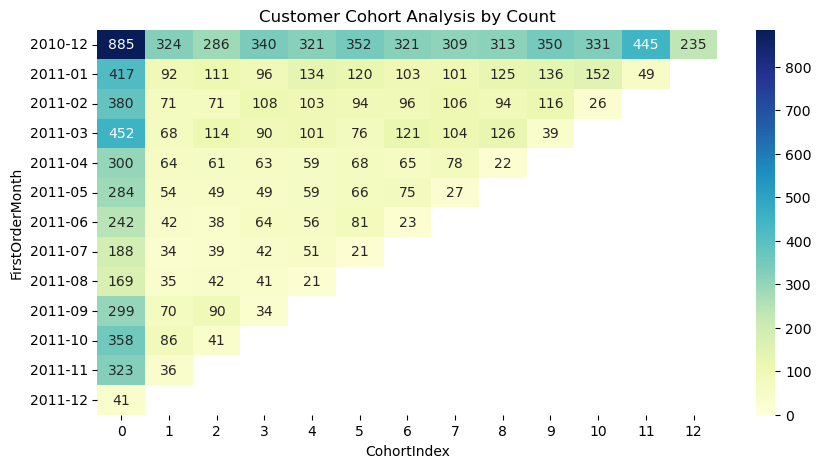

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Customer Cohort Analysis by Count')
sns.heatmap(data=cohort_counts, annot = True, vmin = 0, fmt=".0f", cmap="YlGnBu") # annot: 셀에 값 표시
plt.show()

# Question

### Retention Rate table
- Customer retention Rate(고객 유지율): 전체 고객 중 얼마나 많은 고객이 여전히 활성 상태인지 이해하는 데 매우 유용한 지표  
-> 유지는 "총 고객 수"와 비교하여 "활성 고객의 비율"을 제공

In [621]:
cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size,axis=0) # 처음 주문한 달에 재주문 한 고객을 나타내는 cohort 0으로 각 cohort를 나눠주면 유지율을 구할 수 있다.
retention.round(3) * 100 #백분율 표시

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
FirstOrderMonth,,,,,,,,,,,,,
2010-12,100.0,36.6,32.3,38.4,36.3,39.8,36.3,34.9,35.4,39.5,37.4,50.3,26.6
2011-01,100.0,22.1,26.6,23.0,32.1,28.8,24.7,24.2,30.0,32.6,36.5,11.8,NaN
2011-02,100.0,18.7,18.7,28.4,27.1,24.7,25.3,27.9,24.7,30.5,6.8,NaN,NaN
2011-03,100.0,15.0,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.5,NaN,NaN,NaN,NaN,NaN
2011-06,100.0,17.4,15.7,26.4,23.1,33.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,100.0,18.1,20.7,22.3,27.1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Retention Heatmap

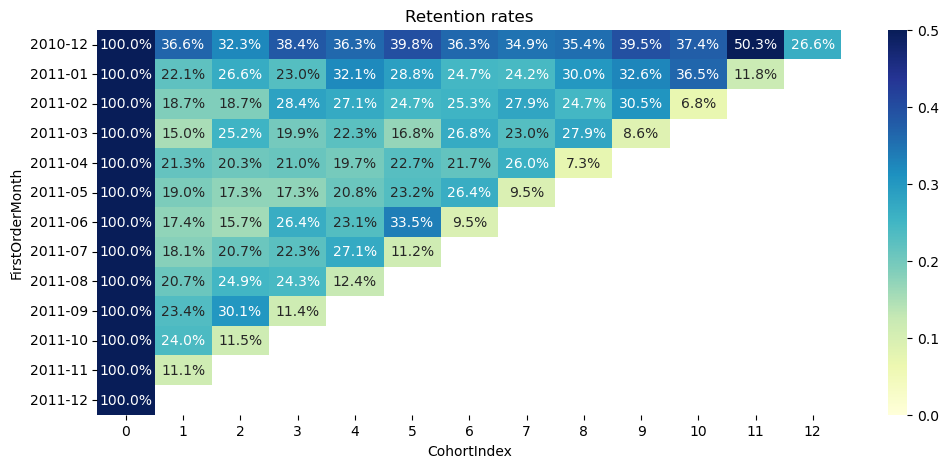

In [694]:
plt.figure(figsize=(12, 5))
plt.title('Retention rates')
sns.heatmap(data=retention, annot = True, vmin = 0.0, vmax = 0.5, fmt = '.1%', cmap="YlGnBu")
plt.show()

In [ ]:
df1.groupby(['FirstOrderMonth'])['CustomerID'].nunique() # 해당 월에 들어온 신규 고객?

FirstOrderMonth
2010-12    885
2011-01    417
2011-02    380
2011-03    452
2011-04    300
2011-05    284
2011-06    242
2011-07    188
2011-08    169
2011-09    299
2011-10    358
2011-11    323
2011-12     41
Freq: M, Name: CustomerID, dtype: int64

### Average Qty for each Cohort

In [629]:
average_quantity = (
    df1.groupby(['FirstOrderMonth', 'CohortIndex'])['Quantity']
    .mean()
    .unstack()
    .round(1)
)

In [637]:
average_quantity # 코호트별 평균 주문 수량

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
FirstOrderMonth,,,,,,,,,,,,,
2010-12,12.1,15.7,15.7,15.9,13.6,14.9,16.1,15.6,18.2,17.7,19.0,13.6,15.4
2011-01,17.5,13.5,12.7,15.3,12.8,15.4,15.0,15.0,11.6,10.6,9.6,10.2,NaN
2011-02,11.2,13.7,19.0,12.0,12.3,12.3,13.6,13.4,11.0,12.4,13.4,NaN,NaN
2011-03,10.0,11.7,13.3,10.1,13.8,13.0,13.5,13.9,11.3,9.7,NaN,NaN,NaN
2011-04,10.0,10.4,9.8,11.9,12.0,8.7,10.0,9.7,7.6,NaN,NaN,NaN,NaN
2011-05,11.5,9.7,14.2,12.8,11.2,8.8,10.8,113.8,NaN,NaN,NaN,NaN,NaN
2011-06,10.7,14.7,10.9,13.7,10.7,10.0,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,9.9,13.8,7.4,8.2,6.2,7.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,10.1,6.2,5.4,6.2,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Average Qty Heatmap

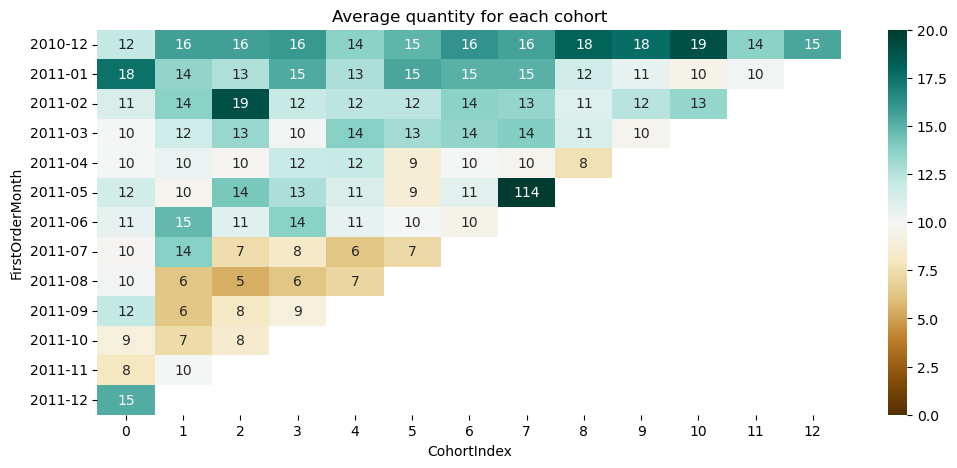

In [648]:
plt.figure(figsize=(12, 5))
plt.title('Average quantity for each cohort')
sns.heatmap(data=average_quantity, annot = True, vmin = 0.0, vmax =20, fmt=".0f", cmap="BrBG")
plt.show()

### Sales by Cohort(코호트별 매출)

In [666]:
df1['Sales'] = df1['Quantity'] * df1['UnitPrice'] # 매출
df1['Sales']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: Sales, Length: 392692, dtype: float64

In [667]:
cohort_revenue = (
    df1.groupby(['FirstOrderMonth', 'CohortIndex'])['Sales'].sum()
    .unstack() #Reshapes the grouped data into a pivot table
)
cohort_revenue

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
FirstOrderMonth,,,,,,,,,,,,,
2010-12,570422.730,275734.47,233390.47,302367.44,204034.38,336113.69,313668.16,310304.03,331001.070,471792.13,455478.90,512341.08,185360.97
2011-01,292366.840,54993.86,63157.01,71526.09,80989.77,84464.57,70073.35,72503.42,71870.481,111370.70,123252.86,26388.03,NaN
2011-02,157700.590,28937.64,40964.47,48155.39,40089.17,34155.67,49673.71,62292.80,55241.340,64688.86,10600.22,NaN,NaN
2011-03,199619.670,30040.34,58958.41,42739.08,51392.44,39962.33,64824.15,70523.62,70847.620,12761.10,NaN,NaN,NaN
2011-04,121809.051,29398.59,25028.57,24282.79,26253.16,30103.24,28505.90,34009.61,6332.000,NaN,NaN,NaN,NaN
2011-05,123739.300,18641.70,20155.73,19162.17,27752.62,32875.34,33168.34,179184.23,NaN,NaN,NaN,NaN,NaN
2011-06,135414.800,14738.49,14104.37,30898.56,26669.90,42531.09,8143.22,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,73860.401,11789.67,15488.37,17391.93,19156.82,6040.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,79601.140,20933.76,35458.48,44487.65,15284.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


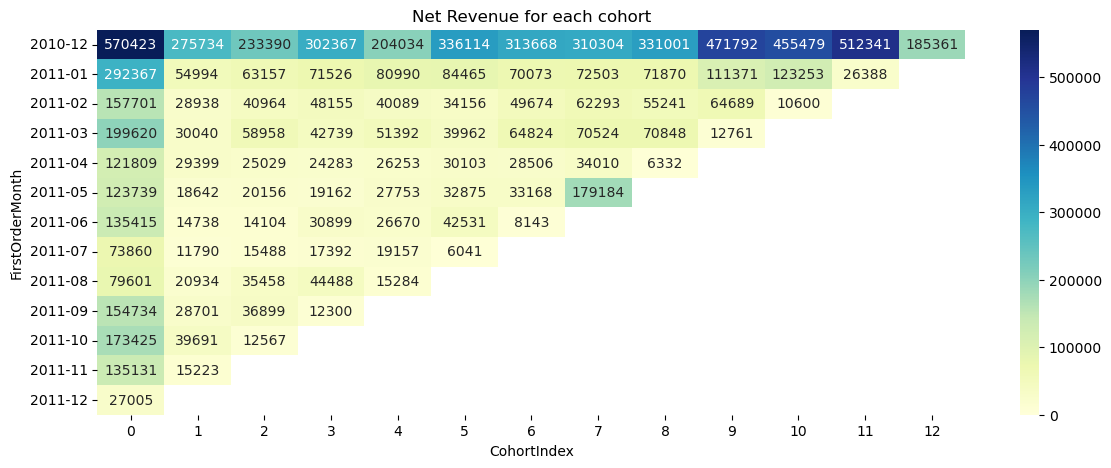

In [ ]:
plt.figure(figsize=(14, 5))
plt.title('Net Revenue for each cohort')
sns.heatmap(data=cohort_revenue,annot = True,vmin = 0.0,fmt=".0f",cmap="YlGnBu") # BuPu
plt.show()

### Cohort Cumulative Sales(코호트 누적 매출)

In [670]:
cohort_cumulative_revenue = (
    df1.groupby(['FirstOrderMonth', 'CohortIndex'])['Sales'].sum()
    .unstack()
    .cumsum(axis=1)  # Calculates the cumulative sum across columns (CohortIndex)
)
cohort_cumulative_revenue

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
FirstOrderMonth,,,,,,,,,,,,,
2010-12,570422.730,846157.200,1079547.670,1381915.110,1585949.490,1922063.180,2235731.340,2546035.370,2877036.440,3348828.570,3804307.470,4316648.550,4502009.52
2011-01,292366.840,347360.700,410517.710,482043.800,563033.570,647498.140,717571.490,790074.910,861945.391,973316.091,1096568.951,1122956.981,NaN
2011-02,157700.590,186638.230,227602.700,275758.090,315847.260,350002.930,399676.640,461969.440,517210.780,581899.640,592499.860,NaN,NaN
2011-03,199619.670,229660.010,288618.420,331357.500,382749.940,422712.270,487536.420,558060.040,628907.660,641668.760,NaN,NaN,NaN
2011-04,121809.051,151207.641,176236.211,200519.001,226772.161,256875.401,285381.301,319390.911,325722.911,NaN,NaN,NaN,NaN
2011-05,123739.300,142381.000,162536.730,181698.900,209451.520,242326.860,275495.200,454679.430,NaN,NaN,NaN,NaN,NaN
2011-06,135414.800,150153.290,164257.660,195156.220,221826.120,264357.210,272500.430,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,73860.401,85650.071,101138.441,118530.371,137687.191,143727.891,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,79601.140,100534.900,135993.380,180481.030,195765.390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


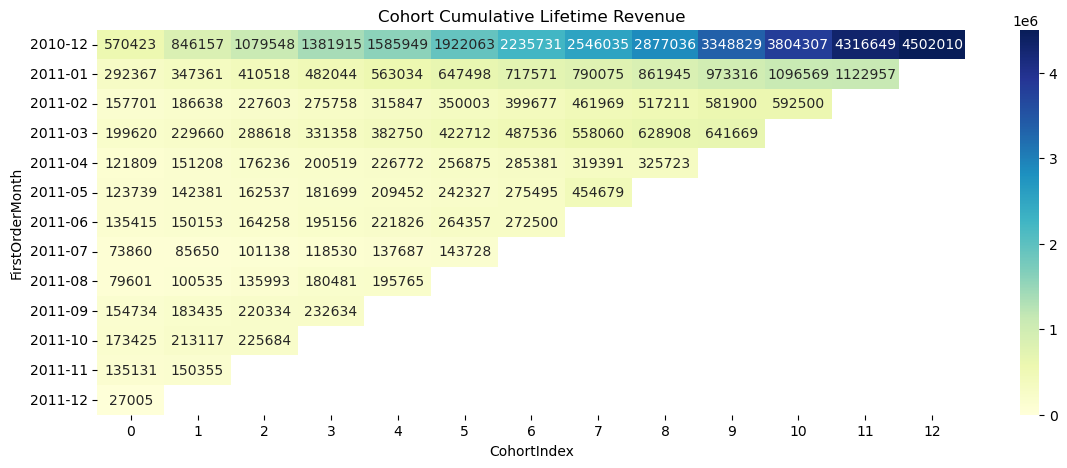

In [677]:
plt.figure(figsize=(14, 5))
plt.title('Cohort Cumulative Lifetime Revenue')
sns.heatmap(data=cohort_cumulative_revenue,annot = True,vmin = 0.0,fmt=".0f",cmap="YlGnBu") # "BuPu"
plt.show()